# Basics of Statistical Modeling

ANY **model** is understood to be an approximation or emulation of a real-world object, event, or process. 

The underlying idea behind virtually all statistical models **is to try to find a relationship between measured features or variables and the probability of a particular outcome.** If it can predict the outcome with perfect certainty, then the model would appear to be a successful model of the real-world phenomenon. That is, presumably you have captured ALL the variables (and their relations) necessary to understand or predict a 'real world' event.

In reality, a model rarely predicts things with perfect accuracy, especially if it involves any phenomenon which is known to contain a great deal of randomness and/or an unknown number of variables (e.g., human behavior).

## Types of Statistical Models

There are many, many types of statistical models. These depend on the types of variables that you have and the type of outcome that you are trying to predict.


### Variables: Quantitative vs Categorical

There are two kinds of variables: **independent variables** are the variables you are observing. The variables that you are gathering about a particular event or observation. The outcome you are trying to predict is called the **dependent variable**

In machine learning (an advanced kind of statistical modeling) these are often referred to as "input" and "output" variables , respectively.

There are two overarching 'types' of statistical models, depending on whether one is trying to predict or estimate a quantitative value, or predict a category. Examples of categorical variables: types of fruits; musical genres; gender; etc. Anything where the various outcomes do not have any kind of quantitative relation with each other. In statistical modeling when we try to predict a categorical outcome, this is referred to as a **classification problem**

On the other hand, if you are trying to estimate a quantitative value, this is typically a **linear model** and is often referred to as a **regression problem** (even though there are many kinds of regression, including regression for categorical variables.) 



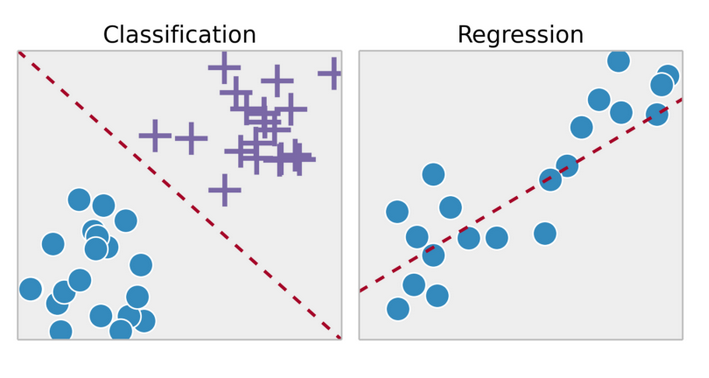

In [1]:
from IPython.display import Image
Image('../images/classification_regression.png', embed=True)

### Note: Finals Data

**All tasks for the final involve classification problems, except for tempo estimation.** However, those of you doing the tempo estimation task will not actually be carrying out a statistical model. Instead you will take an algorithmic approach to estimating tempo. (You will still have to evaluate your algorithm, however).

## Binomial Logistic Regression (Classification for only 2 categories)

we will walk through a classification problem: in this case, binary, so only two categories. We will use a kind of model called *logistic regression* to carry out the task. 

We'll load the `ionosphere` dataset. Here's a description:

      Data Set Information:

      This radar data was collected by a system in Goose Bay, Labrador. This system consists of a phased array of 16 high-frequency antennas with a total transmitted power on the order of 6.4 kilowatts. See the paper for more details. The targets were free electrons in the ionosphere. "Good" radar returns are those showing evidence of some type of structure in the ionosphere. "Bad" returns are those that do not; their signals pass through the ionosphere.
      
Our outcome that we would like to predict is the class (good/bad). Theoretically, if we can successfully model the data, we can know in the future for new data which are 'good' vs 'bad'.

In [2]:
import pandas as pd
original = pd.read_csv('ionosphere.csv')

original.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [3]:
len(original)

351

In [4]:
original['Class'].value_counts()

good    225
bad     126
Name: Class, dtype: int64

Get rid of the two columns 'V1' and 'V2' using `pd.DataFrame.drop`

In [5]:
original.columns
df = original.drop(['V1','V2'], axis=1)
df.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,-0.17755,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
1,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,-0.67743,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
2,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,0.05346,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
3,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
4,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,-0.20275,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


Make two subsets (i.e., DataFrames) of your dataset in `pandas` based on the 'Class' category

In [6]:
good = df[df.Class=='good']
bad = df[df.Class=='bad']

Make a single plot with two subplots stacked vertically and with a very large figure width, one plot for 'good' and one for 'bad' showing all features simultaneously. (You don't need a legend). Do the data appear different in any way?

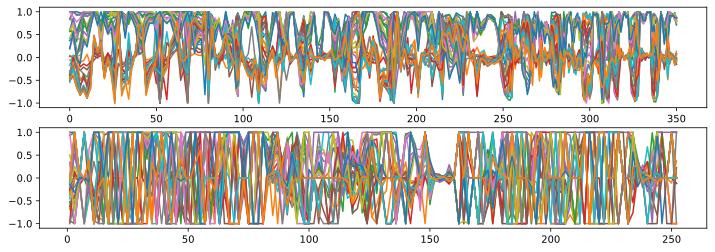

In [7]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(2,1)

ax[0].plot(good.iloc[:,:-1]);
ax[1].plot(bad.iloc[:,:-1]);

Make a boxplot of all the features comparing your "good" and "bad" classes. This can allow you to see the relation between a variable and the outcome, (and which variables are likely going to be better predictors). 

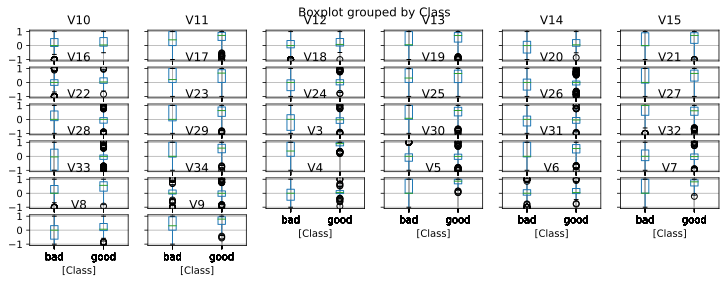

In [8]:
# simple but not pretty:
# note that a semicolon after the call will prevent printouts
df.boxplot(by="Class");


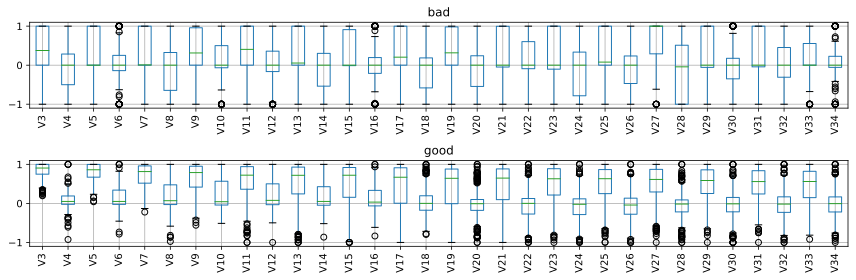

In [9]:
# a bit better...
df.groupby(['Class']).boxplot(layout=(2,1), rot=90)
plt.tight_layout()


## Training a model

#### Splitting Your Data Into Training And Test Sets

To assess your model’s performance later, you will need to divide the data set into two parts: **a training set and a test set**. The first is used to find the best combination of parameters for predicting, while the second is used to evaluate (or test the accuracy of) the learned or trained system.

You will need to divide your data **before** you start training your model. 

The most common splitting choice is to take between 2/3 and 3/4 of your original data set as the training set, while the remainder will be left aside and will compose the test set. (We'll talk about more sophisticated methods, but this is the simplest).

But the question is, how do you split the data? It is best to split the data in a random manner, which means you won't be good at doing it yourself (not to mention that is time consuming). To help us with this task, the `scikit` library provides a tool, called the Model Selection library. There’s a function in the library called `model_selection.train_test_split()`. Using this we can easily split the dataset into the training and the testing datasets in various proportions.

#### Supervised learning

In this case it may seem silly to "predict" something that already has a label. However, the point is actually not to guess the label for something you already have a label for, but to understand whether the relation between variables you have model *is capable* of guessing the correct label for new, previously unseen data. When your model is given a sample of data with the correct labels we call this **supervised learning**. 

Since “correct” output is determined entirely from the labels in the data (what we call "ground truth" -- our model assumes ground truth is "Truth"), noisy or incorrectly labeled data will clearly reduce the effectiveness of your model. Ground truth data labels are rarely perfect in real-world situations (especially for music!). 
For this course's final projects, you will have very high quality ground truth for all datasets. 

We will be using the `sklearn` library for our classification models.


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#### Step 1: Convert your 'Class' column of data to a single binary variable with zeros and ones. 

You can either do this manually (by changing "good" to 1s and "bad" to 0s), or else use the `pd.get_dummies` function showed below. 

In [11]:
#make new column of categorical binary outcomes
class_cat = pd.get_dummies(df['Class'],drop_first=True)
#get rid of the old column
df.drop(['Class'],axis=1,inplace=True)
#concatenate the new column to the dataframe
newdf = pd.concat([class_cat,df],axis=1) 


Note that it is easiest to always have your dependent (outcome) variable as your first or last column of data.

In [12]:
newdf.head()

,good,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
0,1,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,0.85243,...,0.56811,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300
1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,0.50874,...,-0.20332,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447
2,1,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,0.73082,...,0.57528,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238
3,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,0.00000,...,1.00000,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000
4,1,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,0.52798,...,0.03286,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697


#### Step 2: Divide your data into two subsets:
the data column with the ground truth (or "target" or outcome variable) and the remaining data columns with the feature data. Call the subsets 'target' and 'features' respectively.


In [14]:
#all rows, first through remaining columns - predictor variables
features = newdf.iloc[:,1:]
#all rows, first column - outcome variable
outcome = newdf.iloc[:,0]

#### Step 3: Split your data into training and test sets using the `sklearn` packages. 

Note: Add a 'random state' variable by setting equal to any integer value (same as 'seed' in other programs/functions you may have used. This ensures that your data should output the same values every time you run -- note that this does not mean it will output the same as everyone else!)

In [15]:
# test size can be a proportion or an integer
feat_train, feat_test, out_train, out_test = train_test_split(features, outcome, test_size = .25, random_state=25)

In [16]:
#have a look
feat_train.head()

,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,...,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34
258,0.61538,0.18923,0.78157,0.01780,0.77486,0.02647,0.65077,-0.10308,0.77538,0.08000,...,0.60154,-0.07231,0.58803,0.08767,0.55077,0.25692,0.53389,0.09207,0.50609,0.09322
13,1.00000,-0.86701,1.00000,0.22280,0.85492,-0.39896,1.00000,-0.12090,1.00000,0.35147,...,1.00000,-0.17012,1.00000,0.35924,1.00000,-0.66494,1.00000,0.88428,1.00000,-0.18826
140,0.94531,-0.03516,-1.00000,-0.33203,-1.00000,-0.01563,0.97266,0.01172,0.93359,-0.01953,...,0.95703,-0.00391,0.82041,0.13758,0.90234,-0.06641,-1.00000,-0.18750,-1.00000,-0.34375
347,0.95113,0.00419,0.95183,-0.02723,0.93438,-0.01920,0.94590,0.01606,0.96510,0.03281,...,0.94520,0.01361,0.93522,0.04925,0.93159,0.08168,0.94066,-0.00035,0.91483,0.04712
230,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,...,0.00000,0.00000,1.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000


In [60]:
len(feat_train)

263

In [61]:
len(out_train)

263

In [62]:
len(feat_test)

88

#### Step 4: Run (i.e., "fit") the model with `LogisticRegression` 

using `solver='lbfgs'` and save the output to a variable called "model"

In [17]:
model = LogisticRegression(solver='lbfgs') #for simple binary logistic regression we can use all default parameters
model.fit(feat_train, out_train)
predictions = model.predict(feat_test)

#### Step 5: Print your model coefficients 
with the method `model.coef_` There will be one for every column (or feature)

In [18]:
model.coef_

array([[ 1.90206386,  1.28415539,  1.49901051,  1.18921995,  0.6811774 ,
         1.20243551,  1.17014692, -0.1152072 , -0.65207636, -0.42963413,
        -0.53585875,  1.48519087,  0.44943146, -0.02499059,  0.73960873,
         0.20423089, -0.12822177,  0.08351912,  0.28742275, -1.77467996,
         0.38173375,  0.37707681, -0.18917504,  0.86359342, -1.87976026,
        -0.57361426,  0.78403522,  0.52863255,  0.80008966,  0.27381272,
        -0.49355094, -1.04142605]])

#### Step 6: Compute a confusion matrix showing your model results

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(out_test, predictions, labels=[0,1])#parameters are y_truth (i.e.,Ground truth (correct) target values), y_pred (i.e., predicted values from model).
cm

array([[17, 11],
       [ 2, 58]])

In [20]:
pd.DataFrame(cm, columns=["bad","good"], index=["bad","good"])

,bad,good
bad,17,11
good,2,58


Let's use an example  model output:

                   |Died	|Survived|
    | Predicts_died |	159 |	28 |
    
    | Predicts_survived	|35	| 92 |

We can translate these values in each quadrant into the following categories:
    
#### True positives: 92
#### True negatives: 159
#### False positives: 35
#### False negatives: 28

#### What do we infer from the Confusion Matrix?

Confusion Matrix helps us determine how often the model prediction is correct or in other words, the **accuracy** of the model (what proportion of time is it correct). By the above table, It is given by:
( TP + TN ) / Total = 92 + 159 / 314 = .8

Accuracy is, in other words, intuitive: how often did the model 'get it right'?

In [27]:
(92+159)/314

0.7993630573248408

This means that the model is 80% correct. The Confusion Matrix is also used to measure the error rate (the leftover) which is given by:

( FP + FN ) / Total = 62 /314 = 0.197

There is 20% error in the model.

## Precision and Recall

A common way of evaluating a classification model is with *precision* and *recall* values. Precision and recall allows us to break down the 'accuracy' result into how many positives it is correctly identifying versus how many negatives. This is very important, for example, in medicine. You may invent a test to identify the presence of a disease. We want to separate:

a) What proportion of individuals "labeled positive" actually (truly) have the disease? (Precision)<br>
b) What proportion of actual positives (people with the disease) were correctly identified? (Recall, or 'sensitivity')


### Precision = 
   What percentage of the model's positives TRUE? = 
   
   True Positives / (True Positives + False Positives) = 
   
   92 / (92 + 35) = 72%

In [28]:
92 / (92 + 35)

0.7244094488188977

### Recall (a.k.a., sensitivity) = 
   What percentage of TRUE values does the model predict Positive? = 
   
   True Positives / (True Positives + False Negatives) = 
   
   49 / (49 + 178) = 77%

In [29]:
92 / (92 + 28)

0.7666666666666667

### F1-measure = 
   The *harmonic* mean ([see here](https://en.wikipedia.org/wiki/Harmonic_mean)) of precision and recall = 
   
   2 * (precision * recall) / (precision + recall) = 
   
   2 * ((.72 * .77) / (.72 + .77)) = 73%

In [30]:
   2 * ((.72 * .77) / (.72 + .77)) 

0.7441610738255033

### Need to know

I am teaching you about precision, recall, and F1 scores because they are important concepts in modeling and data science. However, for the purposes of this class, we are mainly interested in the accuracy score. That said, these other metrics can be very important for certain kinds of tasks, and are especially important when (a) data on the dependent measure are imbalanced (e.g., the majority of people died vs survived), or (b) you have a task where "one *kind* of right" (i.e., true positive vs true negative) is more important.

You can get all these values in one line by calling the `classification_report` function on your data:

#### Step 6: Print your classification reports 

using `from sklearn.metrics import classification_report`

## Regression modeling with more than 2 categories

Frequently, we need to make predictions of a value with more than 2 categories, such as genre classification. In this case, we need to perform **Multinomial Logistic Regression**.

The actual modeling process is not that different from the last example (from a coding perspective). We will use a different dataset, Iris, to illustrate. (Download the `iris.csv` file from Canvas).

In [66]:
iris = pd.read_csv('iris.csv')
len(iris)

150

There are 150 rows of data in this dataset.

In [67]:
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Let's see how many categories of Iris flowers are there?

In [68]:
iris['Species'].unique() #gives the unique list of events in the specified column

array(['setosa', 'versicolor', 'virginica'], dtype=object)

We want to see if any of the features (various measurements) can predict the different species.

As always, let us graph our data first to get a sense of the variability and relatedness of each feature:

<AxesSubplot:>

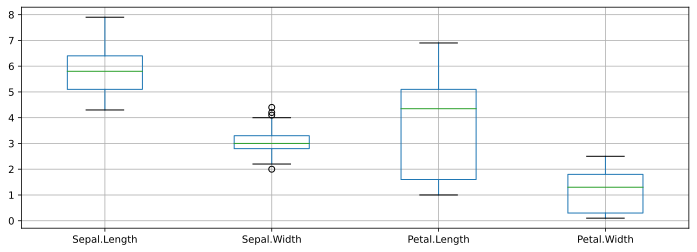

In [70]:
iris.boxplot()

## Correlation

Let's plot the correlation matrix. 

In [71]:
iris.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


Notice that "Petal Length" & "Sepal Length" are correlated with an r value of .87, and "Petal Length & Petal Width" are correlated with an r value of .96!

What this means is that the model may struggle to find the optimal "fit." This sometimes can confuse the model and make it hard to converge on the "correct" line of fit. We'll come back to how to deal with this.

Let's also look to see if the means and spread of the values appear different across our four feature categories:

In [72]:
#Here is a handy function, btw
iris.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


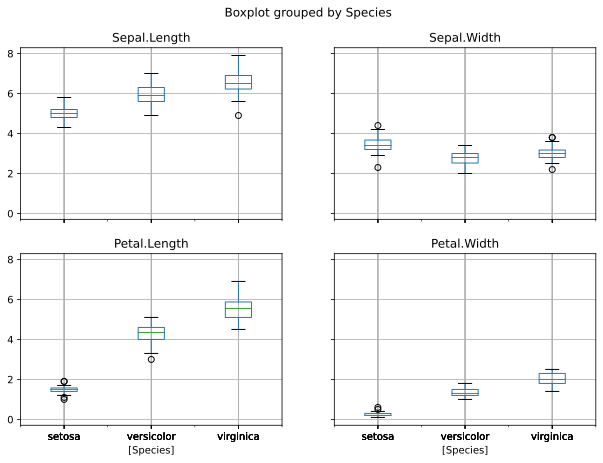

In [74]:
iris.boxplot(column=['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width'], by=['Species'], figsize=(10,7));

As before, separate your dataframe into 'categories to predict' and 'predictors':

In [76]:
outcome = iris[['Species']]
predictors = iris[['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']]
#predictors.columns = ['Sepal.Length', 'Sepal.Width', 'Petal.Length','Petal.Width']


Create training and test sets

In [77]:
feat_train, feat_test, out_train, out_test = train_test_split(predictors, outcome, test_size=.33, random_state=5)


As before, import the `LogisticRegression` module and create a Logistic Regression classifier object using LogisticRegression() function.

In [78]:
#Note we use the same `LogisticRegression` function but change the "class" parameter:

multimodel = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', max_iter = 5000)

Then, fit your model on the train set using `fit()` and perform prediction on the test set using `predict()`.

In [80]:
multimodel.fit(feat_train, out_train.Species) #note that in the model fit you have to specifiy the column with the category names to train on
model_pred=multimodel.predict(feat_test)

In [81]:
import math
multi_coefficients = pd.DataFrame(multimodel.coef_)
multi_coefficients.columns = predictors.columns
multi_coefficients.index = ['setosa', 'versicolor', 'virginica'] #recall 'unique' function earlier
multi_coefficients

print(multi_coefficients.applymap(math.exp))

            Sepal.Length  Sepal.Width  Petal.Length  Petal.Width
setosa          0.664431     2.332885      0.110197     0.381028
versicolor      1.831750     0.643341      0.851845     0.410404
virginica       0.821644     0.666293     10.652900     6.394865


These coefficients can be understood as helping explain the value of each feature in predicting each particular Species (or category). They attempt to explain the change in one variable in relation to a baseline variable. 

Let's look at the confusion matrix:

In [84]:
from sklearn import metrics
iris_matrix = metrics.confusion_matrix(out_test, model_pred)
iris_matrix

array([[16,  0,  0],
       [ 0, 16,  1],
       [ 0,  0, 17]])

Diagonal of the multidimensional array always represents correctly predicted items. Let's convert again to a datafram structure to make it easier to see

In [85]:
pd.DataFrame(iris_matrix, columns=['setosa', 'versicolor', 'virginica'], index=['Predicts_setosa','Predicts_versicolor','Predicts_virginica'])

,setosa,versicolor,virginica
Predicts_setosa,16,0,0
Predicts_versicolor,0,16,1
Predicts_virginica,0,0,17


Evaluate the model (as before) using model evaluation metrics such as accuracy, precision, and recall.

In [87]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
print(classification_report(out_test, model_pred))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        16
  versicolor       1.00      0.94      0.97        17
   virginica       0.94      1.00      0.97        17

    accuracy                           0.98        50
   macro avg       0.98      0.98      0.98        50
weighted avg       0.98      0.98      0.98        50



## A note about baseline measures

In this case, our dataset was pretty equallly weighted among flowers of the 3 types. Sometimes we have datasets where up to 75% or 80% of the values are all of one variety or class. While this can make it a little tricker to get good results, it's still possible. However, a model that simply guessed the most popular class in the 'prediction' category in that case would end up being right with an accuracy score equal to the proportion of that class! (E.g., if you try to predict 'survive' and 70% of people died, then the model would anyway be correct 70% of the time by simply always choosing the most likely answer.)

That is why when we have 'biased' datasets, we will always want to provide a "baseline" to show that the model we made improves classification "over and above" the simple baseline model.

## For your information...

#### Unsupervised Learning

Unsupervised learning is effectively a tool for self-organization of data. Given some set of input features (say, color, shape, etc.) a model tries to group objects based on features that appeared to be shared. (See example image below).  

The most common task for unsupervised learning is clustering or classification when the optimal combination of features that distinguish the data are unknown *and* there are no labels for the data. Sometimes unsupervised learning is used to learn *about* the data. 

A great example for music is so-called "functional" chord analysis. There is a system in music theory where any chord can supposedly be labeled as either "T" (tonic), "P" (predominant), or "D" (dominant). However, maybe there is a more appropriate way of categorizing Roman numerals that better accounts for the way that chords behave? (Interested? See:  Music Theory Spectrum, Volume 40, Issue 2, Fall 2018, Pages 314–335O, https://doi.org/10.1093/mts/mty021)

**In all of these cases, we wish to learn the inherent structure of our data without using explicitly-provided labels or a predetermined number of "states".** Since no labels are provided, there is no specific way to compare model performance in most unsupervised learning methods.

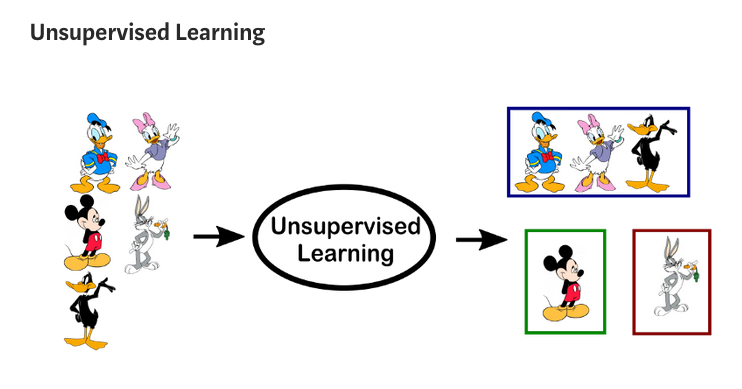

In [29]:
Image('../images/unsupervisedLearning.png', embed=True)

### Model Types

You will likely read about many *types* of machine learning tools and models for classification and clustering. Since explaining these approaches is beyond the scope of this class, AND we are not concerned with accuracy but rather a proof-of-concept implementation, we will simply stick with simple regression models for this class. (In other words, if you read online about things like *"SVMs", "random forsests",* or *"neural networks"* you can simply know for now that that these are all different methods for optimizing a classification model, but you shouldn't attempt to use one of them in your final projects without consulting me first.